In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
train_data=pd.read_csv('C:/Users/Rita/Desktop/New folder/train_data.csv')
print('Data Shape:', train_data.shape)
train_data

Data Shape: (300000, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,Female,30,1,8.0,0,1-2 Year,Yes,52698.0,26.0,44,0
299996,299997,Female,59,1,8.0,1,1-2 Year,No,45686.0,7.0,171,0
299997,299998,Female,40,1,8.0,0,1-2 Year,Yes,34350.0,124.0,253,0
299998,299999,Female,24,1,8.0,0,< 1 Year,No,24070.0,152.0,183,0


In [3]:
sample_submission=pd.read_csv('C:/Users/Rita/Desktop/New folder/sample_submission.csv')
print('Data Shape:', sample_submission.shape)
sample_submission.head()
#sample_submission['1'].value_counts()

Data Shape: (81108, 2)


,300001,1
0,300002,1
1,300003,1
2,300004,1
3,300005,1
4,300006,1


In [4]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,38.815840,0.997863,26.382180,0.457947,30534.312123,112.118003,154.323843,0.122937
std,86602.684716,15.495699,0.046175,13.232431,0.498229,17247.475889,54.141651,83.643687,0.328365
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,75000.750000,25.000000,1.000000,15.000000,0.000000,24388.000000,29.000000,82.000000,0.000000
50%,150000.500000,36.000000,1.000000,28.000000,0.000000,31642.000000,133.000000,154.000000,0.000000
75%,225000.250000,49.000000,1.000000,35.000000,1.000000,39360.250000,152.000000,227.000000,0.000000
max,300000.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [3]:
test_data=pd.read_csv('C:/Users/Rita/Desktop/New folder/test_data.csv')
print('Data Shape:', test_data.shape)
test_data.head()

Data Shape: (81109, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,300001,Male,67,1,8.0,1,1-2 Year,No,34821.0,26.0,35
1,300002,Male,33,1,18.0,1,< 1 Year,No,2630.0,152.0,88
2,300003,Male,27,1,28.0,1,< 1 Year,No,41244.0,152.0,226
3,300004,Male,75,1,8.0,0,1-2 Year,Yes,41078.0,7.0,202
4,300005,Male,41,1,31.0,0,1-2 Year,Yes,2630.0,124.0,17


In [4]:
test_data=test_data.drop(labels=None, axis=0, index=None, columns='Gender', level=None, inplace=False, errors='raise')
test_data=test_data.drop(labels=None, axis=0, index=None, columns='Vehicle_Age', level=None, inplace=False, errors='raise')
test_data=test_data.drop(labels=None, axis=0, index=None, columns='Vehicle_Damage', level=None, inplace=False, errors='raise')

In [26]:
test_data

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,300001,67,1,8.0,1,34821.0,26.0,35
1,300002,33,1,18.0,1,2630.0,152.0,88
2,300003,27,1,28.0,1,41244.0,152.0,226
3,300004,75,1,8.0,0,41078.0,7.0,202
4,300005,41,1,31.0,0,2630.0,124.0,17
...,...,...,...,...,...,...,...,...
81104,381105,74,1,26.0,1,30170.0,26.0,88
81105,381106,30,1,37.0,1,40016.0,152.0,131
81106,381107,21,1,30.0,1,35118.0,160.0,161
81107,381108,68,1,14.0,0,44617.0,124.0,74


In [ ]:
# age>60 ->0
# Annual_Premium > 60000 && damaged or Annual_Premium<5000 ->0

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.5+ MB


In [10]:
profile = ProfileReport(df = train_data)
profile.to_file(output_file = 'Pre Profiling Report.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

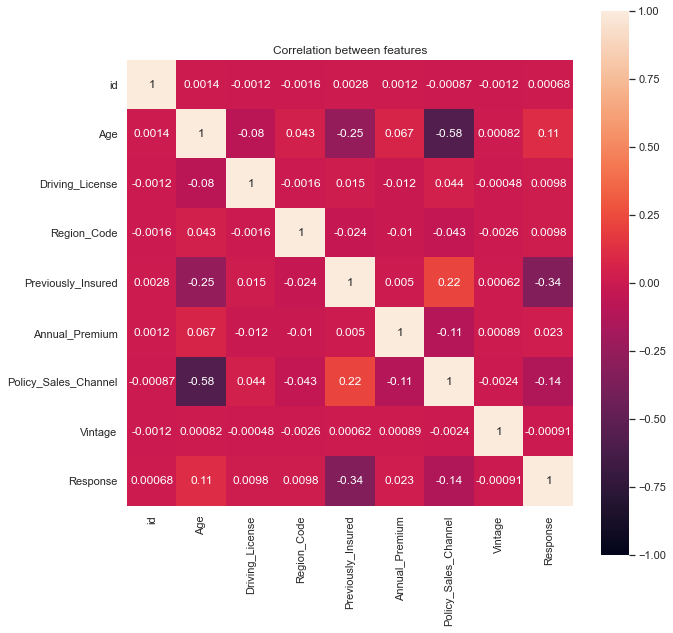

In [11]:
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation between features')

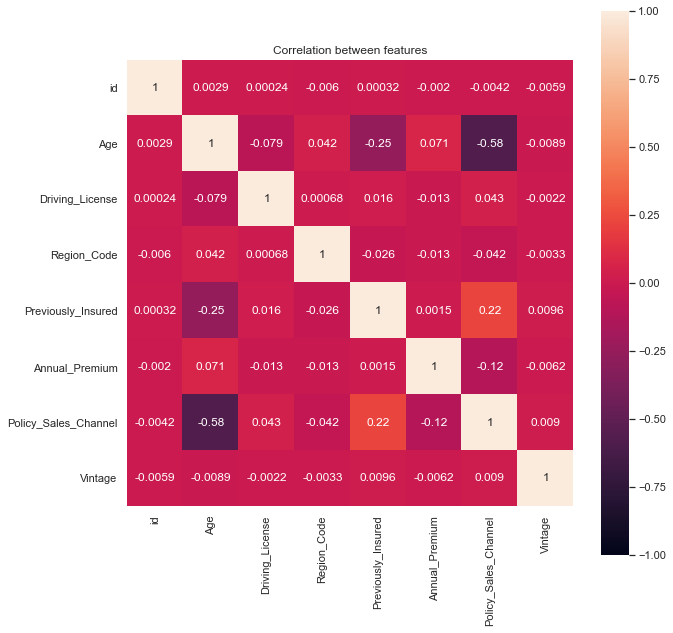

In [76]:
corr = test_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

In [7]:
#Preprocessing the data
#Dropping columns Gender,Vehicle_Age,Vehicle_Damage
drop_cols = ['Gender','Vehicle_Age','Vehicle_Damage']

In [5]:
train_data=train_data.drop(labels=None, axis=0, index=None, columns='Gender', level=None, inplace=False, errors='raise')
train_data=train_data.drop(labels=None, axis=0, index=None, columns='Vehicle_Age', level=None, inplace=False, errors='raise')
train_data=train_data.drop(labels=None, axis=0, index=None, columns='Vehicle_Damage', level=None, inplace=False, errors='raise')

In [9]:
train_data.shape[1]

9

In [10]:
train_data['Response'].value_counts()

0    263119
1     36881
Name: Response, dtype: int64

In [11]:
train_data['Response'].sum()/train_data['Response'].shape[0]

0.12293666666666667

In [6]:
X = train_data.drop(['Response'], axis=1)
X.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


In [7]:
y = train_data["Response"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(225000, 8)
(225000,)
(75000, 8)
(75000,)


In [53]:
y_test.head(20)

205179    0
101710    0
89106     0
193046    0
99093     0
105506    0
298780    0
44748     0
288650    0
55207     0
185212    1
2346      1
133629    1
158701    0
80970     1
142289    0
89958     0
132101    0
249578    0
250431    0
Name: Response, dtype: int64

In [9]:
## Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred=model_lr.predict(X_test)

In [27]:
y_pred1=model_lr.predict(test_data)

In [18]:
print(model_lr.predict(X_test))

[0 0 0 ... 0 0 0]


In [11]:
## Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)
predict = model.predict(X_test)
print(X_test['id'],predict)
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train,y_train)

112692    112693
19498      19499
31689      31690
231780    231781
4298        4299
           ...  
206596    206597
118186    118187
173973    173974
220856    220857
90128      90129
Name: id, Length: 75000, dtype: int64 [0 0 0 ... 0 0 0]


DecisionTreeClassifier(random_state=1)

In [24]:
#from sklearn.tree import DecisionTreeClassifier
#model=DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)
predict = model.predict(test_data)
pred=pd.DataFrame(predict)
print(test_data['id'])
print(pred)

0        300001
1        300002
2        300003
3        300004
4        300005
          ...  
81104    381105
81105    381106
81106    381107
81107    381108
81108    381109
Name: id, Length: 81109, dtype: int64
       0
0      0
1      0
2      0
3      0
4      0
...   ..
81104  0
81105  0
81106  0
81107  1
81108  0

[81109 rows x 1 columns]


In [32]:
predic = pd.DataFrame(prediction1_rf,test_data.id,columns=['predict']).to_csv('data.csv',header=False)

In [13]:
# pred = pd.DataFrame(predict,index=test_data.id,columns=['predict']).to_csv("data1.csv",header=False, index=False)

In [14]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [15]:
#Using the Model for Prediction
prediction_rf = pd.DataFrame()
prediction_rf = model_rf.predict(X_test)

In [31]:
prediction_rf = pd.DataFrame()
prediction1_rf = model_rf.predict(test_data)

In [16]:
prediction1_rf = model_rf.predict(test_data)

In [25]:
prediction_rf

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
prediction_lr = pd.DataFrame()
prediction_lr = model_lr.predict(X_test)

In [38]:
predic = pd.DataFrame(prediction1_lr,test_data.id,columns=['predict']).to_csv('data1.csv',header=False)

In [37]:
prediction1_lr = model_lr.predict(test_data)

In [33]:
prediction_dt = pd.DataFrame()
prediction1_dt = model_dt.predict(test_data)

In [36]:
predic = pd.DataFrame(prediction1_dt,test_data.id,columns=['predict']).to_csv('data2.csv',header=False)

In [ ]:
prediction_dt = model_dt.predict(X_test)

In [39]:
y_pred_train = model_dt.predict(X_train) 
y_pred_test = model_dt.predict(X_test) 

In [40]:
#Model Evaluation using accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy score for train data:', accuracy_train)
print('Accuracy score for test data:', accuracy_test)

Accuracy score for train data: 1.0
Accuracy score for test data: 0.8160533333333333


In [61]:
##Model Evaluation using accuracy_score
print('Accuracy score for test data with Random Forest Model is:',accuracy_score(y_test, prediction_rf))
print('Accuracy score for test data with Logistic Regression is:',accuracy_score(y_test, prediction_lr))
print('Accuracy score for test data with Decision Tree is:',accuracy_score(y_test, prediction_dt))

Accuracy score for test data with Random Forest Model is: 0.8721066666666667
Accuracy score for test data with Logistic Regression is: 0.877
Accuracy score for test data with Decision Tree is: 0.8160533333333333


In [20]:
# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with RF is:\n',confusion_matrix(y_test, prediction_rf))
print('Confusion matrix for test data with LR is:\n',confusion_matrix(y_test, prediction_lr))
print('Confusion matrix for test data with DT is:\n',confusion_matrix(y_test, prediction_dt))

Confusion matrix for test data with RF is:
 [[64875   900]
 [ 8692   533]]
Confusion matrix for test data with LR is:
 [[65775     0]
 [ 9225     0]]
Confusion matrix for test data with DT is:
 [[58535  7240]
 [ 6556  2669]]


In [21]:
#Model evaluation using precision score
from sklearn.metrics import precision_score
precision_rf = precision_score(y_test,prediction_rf)
print('Precision score for test data using RF is:', precision_rf)
precision_lr = precision_score(y_test,prediction_lr)
print('Precision score for test data using LR is:', precision_lr)
precision_dt = precision_score(y_test,prediction_dt)
print('Precision score for test data using DT is:', precision_dt)

Precision score for test data using RF is: 0.371946964410328
Precision score for test data using LR is: 0.0
Precision score for test data using DT is: 0.269351094964174


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Model evaluation using recall score
from sklearn.metrics import recall_score
print('Recall score for test data using RF is:',recall_score(y_test,prediction_rf))   
print('Recall score for test data using LR is:',recall_score(y_test,prediction_lr))
print('Recall score for test data using DT is:',recall_score(y_test,prediction_dt))

Recall score for test data using RF is: 0.057777777777777775
Recall score for test data using LR is: 0.0
Recall score for test data using DT is: 0.28932249322493225


In [23]:
#Model evaluation using F1_score
from sklearn.metrics import f1_score
print('F1_score for test data using RF is:',f1_score(y_test, prediction_rf))
print('F1_score for test data using LR is:',f1_score(y_test, prediction_lr))
print('F1_score for test data using DT is:',f1_score(y_test, prediction_dt))

F1_score for test data using RF is: 0.10001876524676301
F1_score for test data using LR is: 0.0
F1_score for test data using DT is: 0.27897982648688197


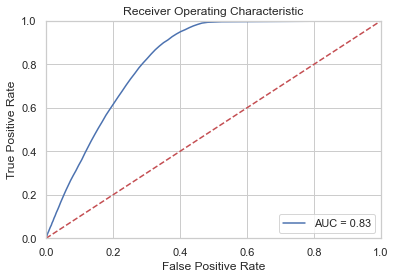

In [50]:
#Model evaluation using ROC_AUC curve
#For RF Model
from sklearn import metrics
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
y_test

205179    0
101710    0
89106     0
193046    0
99093     0
         ..
196552    0
289972    0
283268    0
174729    0
161355    0
Name: Response, Length: 75000, dtype: int64

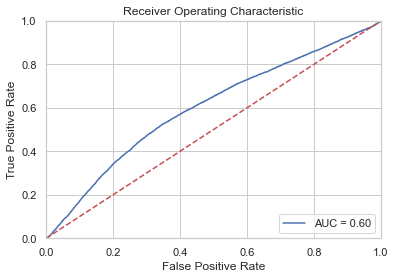

In [52]:
#For LR Model
from sklearn import metrics
probs = model_lr.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

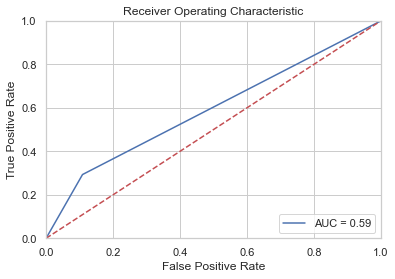

In [53]:
#For DT Model
from sklearn import metrics
probs = model_dt.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
# prediction of test data
y_pred = model_lr.predict(test_data)
score = model_lr.score(test_data, y_pred)
print(y_pred)     # see the predictions

[0 0 0 ... 0 0 0]


In [36]:
y_pred = model_lr.predict(X_test)
score = model_lr.score(X_test, y_pred)
print(y_pred)     # see the predictions

[0 0 0 ... 0 0 0]
